<a href="https://colab.research.google.com/github/Betty1480/Titanic-Exploratory-Data-Analysis/blob/main/Titanic_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
print(data.head())  # Preview first 5 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
data.shape  # Check dimensions (rows, columns)

(891, 12)

In [6]:
print(data.info())  # Data types & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(data.describe())  # Summary statistics

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print(data.nunique())   # Unique values per column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [9]:
print(data.duplicated().sum())  # Check duplicates

0


In [10]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
#Missing Values Treatment
#Age: Imputed with median (robust to outliers).

#Cabin: Dropped (too many missing values).

#Embarked: Filled with mode (most frequent value).
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)



/tmp/ipython-input-12-1219832557.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-12-1219832557.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [13]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-13-4053712005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


KeyError: "['Cabin'] not found in axis"

In [14]:
#Missing Values Treatment
#Age: Imputed with median (robust to outliers).

#Cabin: Dropped (too many missing values).

#Embarked: Filled with mode (most frequent value).
data['Age'].fillna(data['Age'].median(), inplace=True)
# Check if 'Cabin' column exists before dropping
if 'Cabin' in data.columns:
    data.drop('Cabin', axis=1, inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-14-1645801185.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Univariate Analysis: Examine each feature at a time to understand its distribution and seek to answer questions like:


What is the age distribution of passengers?

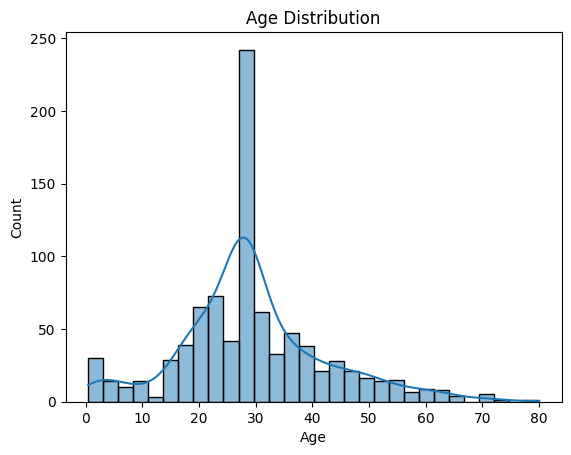

In [15]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

How many passengers embarked from each location?

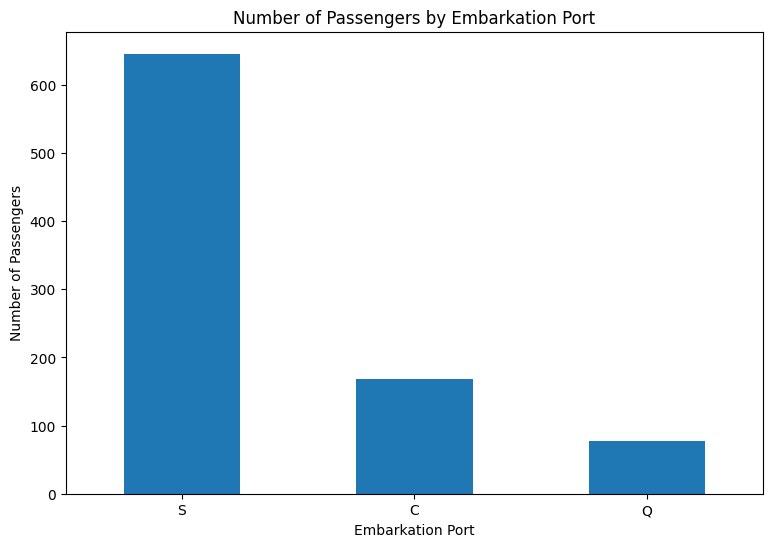

Embarkation counts:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [17]:
# Embarked distribution
plt.figure(figsize=(9, 6))
data['Embarked'].value_counts().plot(kind='bar')
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

print("Embarkation counts:")
print(data['Embarked'].value_counts())

Are ticket prices evenly distributed, or are they skewed?

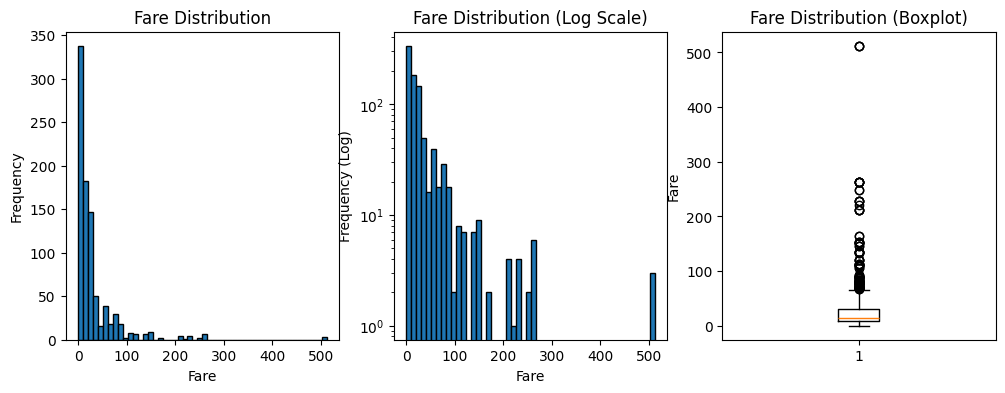

Fare skewness: 4.78


In [18]:
# Fare distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data['Fare'], bins=50, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Fare'], bins=50, log=True, edgecolor='black')
plt.title('Fare Distribution (Log Scale)')
plt.xlabel('Fare')
plt.ylabel('Frequency (Log)')

plt.subplot(1, 3, 3)
plt.boxplot(data['Fare'])
plt.title('Fare Distribution (Boxplot)')
plt.ylabel('Fare')
plt.show()

# Check for fare skewness
from scipy import stats
print(f"Fare skewness: {stats.skew(data['Fare']):.2f}")

# Bivariate Analysis: Examine pairs of features of interest. Justify which features you would like to pair in the analysis and seek to answer questions like?

# Does the Fare change depending on the Pclass?

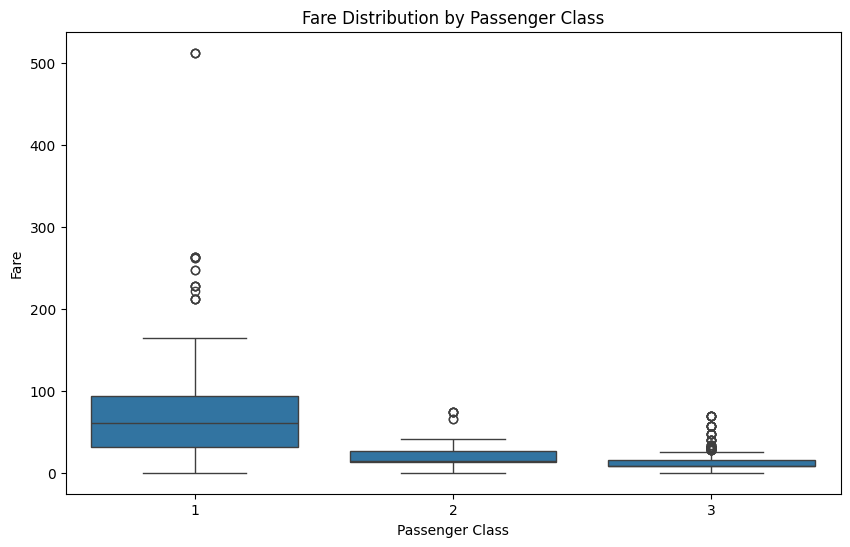

ANOVA F-statistic: 242.34, p-value: 0.0000


In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Statistical test
from scipy.stats import f_oneway
class1_fare = data[data['Pclass'] == 1]['Fare']
class2_fare = data[data['Pclass'] == 2]['Fare']
class3_fare = data[data['Pclass'] == 3]['Fare']
f_stat, p_value = f_oneway(class1_fare, class2_fare, class3_fare)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

# Are younger passengers more likely to survive on the Titanic?

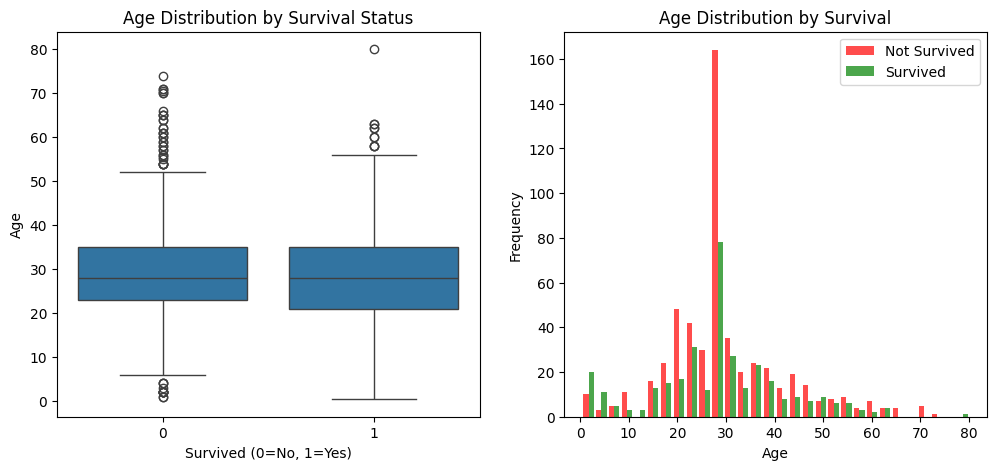

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
survived_age = data[data['Survived'] == 1]['Age'].dropna()
not_survived_age = data[data['Survived'] == 0]['Age'].dropna()
plt.hist([not_survived_age, survived_age], bins=30, alpha=0.7,
         label=['Not Survived', 'Survived'], color=['red', 'green'])
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Does the Embarked location affect survival rate?

# Does the Embarked location affect survival rate?

Embarkation vs Survival Cross-table:
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  219  646
All       549  342  891


<Figure size 800x600 with 0 Axes>

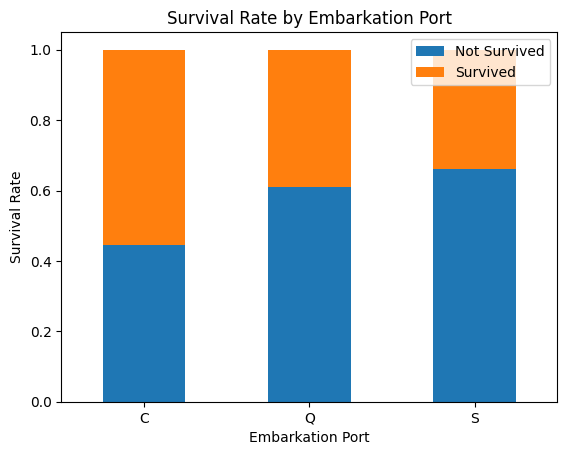

In [24]:
# Cross-tabulation
embark_survival = pd.crosstab(data['Embarked'], data['Survived'], margins=True)
print("Embarkation vs Survival Cross-table:")
print(embark_survival)

# Visualization
plt.figure(figsize=(8, 6))
embark_survival_pct = pd.crosstab(data['Embarked'], data['Survived'], normalize='index')
embark_survival_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

# Multivariate analysis: Explore more complex relationships between three or more variables simultaneously. Detect interactions, combined effects, and hidden patterns that may not be visible in bivariate analysis. This can help answer complex questions, such as:

# How do Pclass, Age, and Fare jointly affect survival?

/tmp/ipython-input-25-477399216.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()


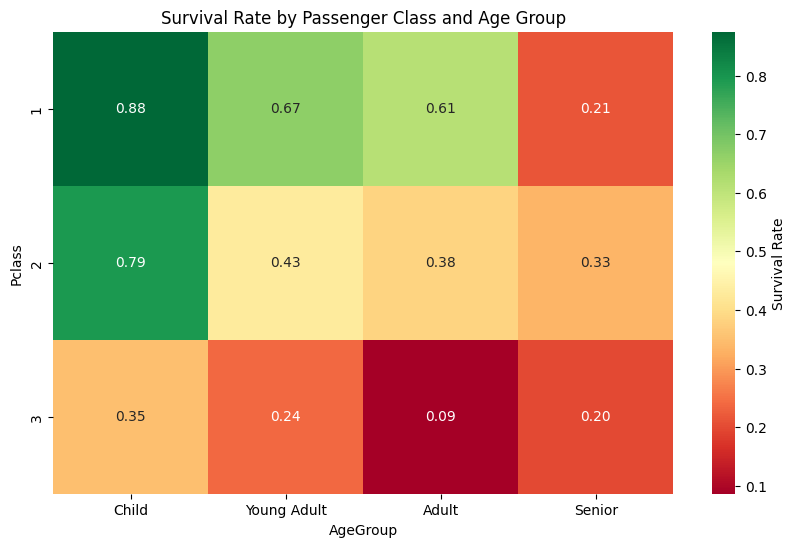

In [25]:
# Create age groups for better visualization
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 35, 60, 100],
                        labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Heatmap of survival rates
survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(survival_by_class_age, annot=True, cmap='RdYlGn',
            fmt='.2f', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate by Passenger Class and Age Group')
plt.show()

# Are survival rates different for Embarked locations when considering Pclass?

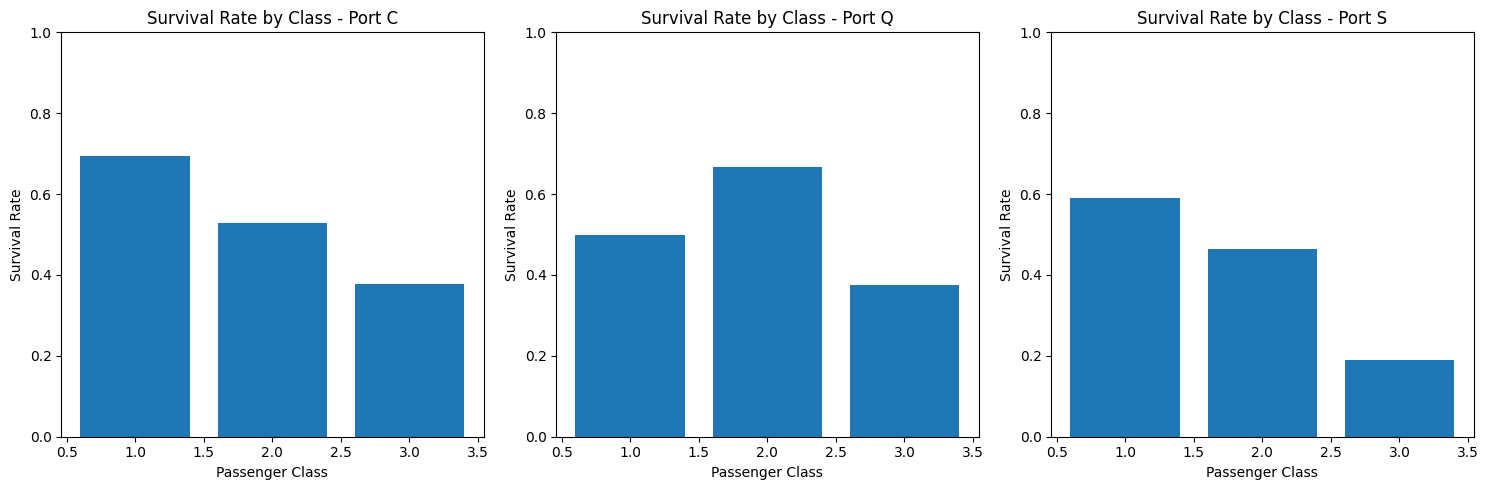

In [26]:
# Multi-level analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, embark in enumerate(['C', 'Q', 'S']):
    embark_data = data[data['Embarked'] == embark]
    survival_by_class = embark_data.groupby('Pclass')['Survived'].mean()
    axes[i].bar(survival_by_class.index, survival_by_class.values)
    axes[i].set_title(f'Survival Rate by Class - Port {embark}')
    axes[i].set_xlabel('Passenger Class')
    axes[i].set_ylabel('Survival Rate')
    axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

# Outlier detection and handling: There are different ways to handle outliers, which include removing, capping, imputing, or leaving them as is. Argue and justify your selected method of handling outliers for each feature, e.g.

# Removing outliers in Fare may help for predictive models, but could hide important insights for understanding passenger wealth.

In [28]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in Fare
fare_outliers, fare_lower, fare_upper = detect_outliers_iqr(data, 'Fare')
print(f"Number of fare outliers: {len(fare_outliers)}")
print(f"Fare outlier bounds: [{fare_lower:.2f}, {fare_upper:.2f}]")

# Detect outliers in Age
age_outliers, age_lower, age_upper = detect_outliers_iqr(data.dropna(subset=['Age']), 'Age')
print(f"Number of age outliers: {len(age_outliers)}")

Number of fare outliers: 116
Fare outlier bounds: [-26.72, 65.63]
Number of age outliers: 66


# Target Variable Exploration: Analyze the Target/Dependent Variable Survived and explore:
# The distribution of the target variable (Survived) using countplots and bar plots.
# How balanced or imbalanced the dataset is.
# What factors (like age, gender, class, or embarkation point) may influence survival?
# Use combined plots to detect interaction effects

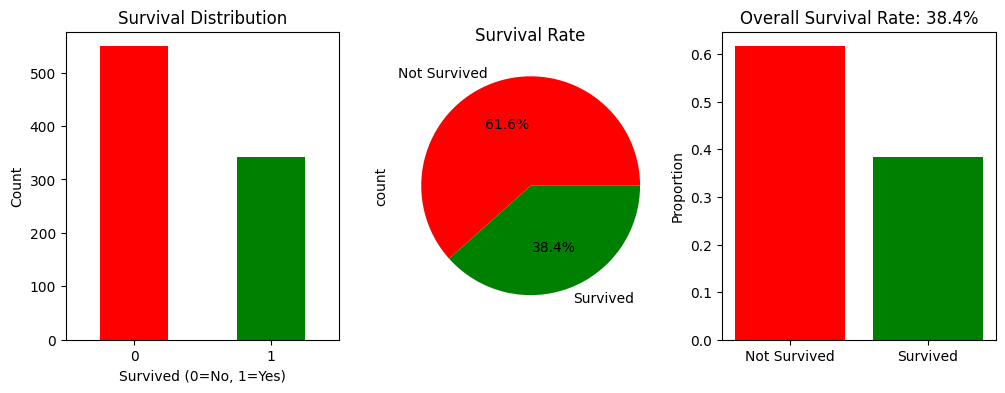

Dataset balance - Survived: 38.4%, Not Survived: 61.6%


In [31]:
# Survival distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
data['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Distribution')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
data['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                   colors=['red', 'green'], labels=['Not Survived', 'Survived'])
plt.title('Survival Rate')

# Class imbalance check
survival_rate = data['Survived'].mean()
plt.subplot(1, 3, 3)
plt.bar(['Not Survived', 'Survived'], [1-survival_rate, survival_rate],
        color=['red', 'green'])
plt.title(f'Overall Survival Rate: {survival_rate:.1%}')
plt.ylabel('Proportion')
plt.show()

print(f"Dataset balance - Survived: {survival_rate:.1%}, Not Survived: {1-survival_rate:.1%}")

/tmp/ipython-input-33-697362509.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', ax=axes[1,1], color='orange')


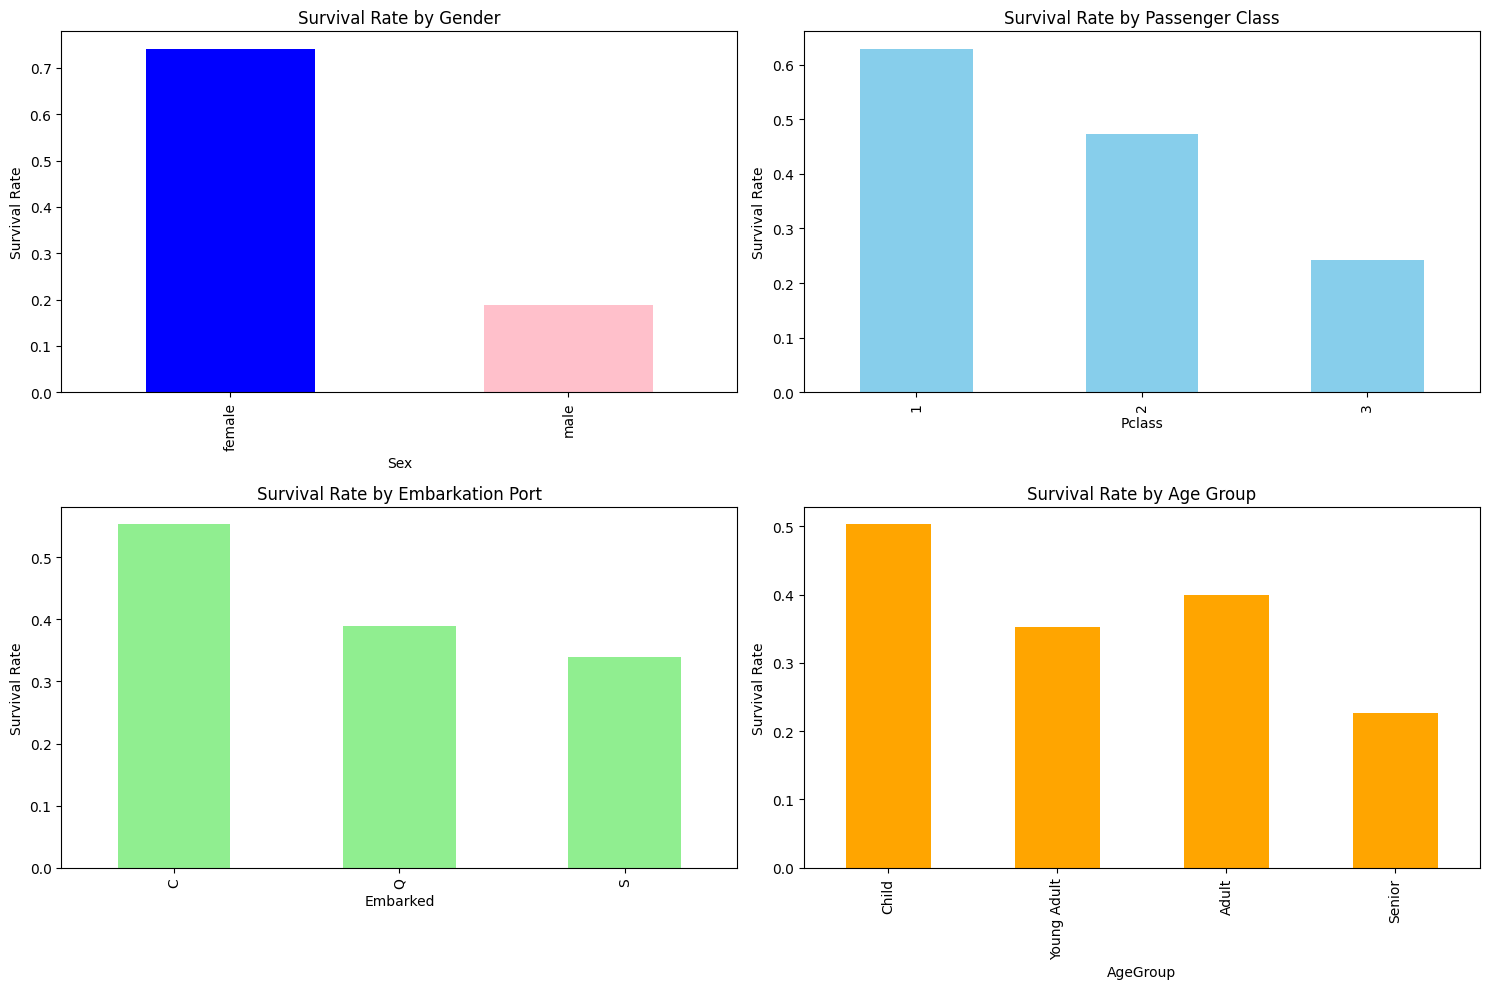

In [33]:
# Survival by multiple factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender
data.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[0,0], color=['blue', 'pink'])
axes[0,0].set_title('Survival Rate by Gender')
axes[0,0].set_ylabel('Survival Rate')

# Passenger Class
data.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Survival Rate by Passenger Class')
axes[0,1].set_ylabel('Survival Rate')

# Embarkation Port
data.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Survival Rate by Embarkation Port')
axes[1,0].set_ylabel('Survival Rate')

# Age Groups
data.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Survival Rate by Age Group')
axes[1,1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()